In [1]:
import sys
import os
current_dir = os.path.dirname(os.path.abspath('./'))
if not current_dir in sys.path:
    sys.path.append(current_dir)
from utils import *
from sklearn.model_selection import train_test_split
from alltools.machine_learning.designer import *

def plot_predicted_CWT_tc(Y_true, Y_pred, X):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.set_size_inches(15, 5)
    ax1.plot(X)
    ax1.set_title('Original signal')
    mapable = ax2.imshow(
        Y_true,
        aspect='auto',
        origin='lower',
        cmap='coolwarm',
    )
    ax2.set_title('CWT')
    plt.colorbar(mapable, ax=ax2)
    mapable = ax3.imshow(
        Y_pred,
        aspect='auto',
        origin='lower',
        cmap='coolwarm',
    )
    ax3.set_title('Prediction')
    plt.colorbar(mapable, ax=ax3)
    plt.show()

2022-06-10 20:21:23.511950: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-10 20:21:23.511984: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
spectralgen = CWTDatasetGenerator(0, 1, 256)

X, Y = list(), list()

for i, (x, y) in enumerate(spectralgen(10000)):

    if not i%1000:
        print(i)

    # print(x.shape, y.shape)
    # fig, (ax1, ax2) = plt.subplots(1, 2)
    # ax1.plot(spectralgen.times, x)

    # mapable = ax2.imshow(
    #     normal_rows(y),
    #     # cwtmatr,
    #     aspect='auto',
    #     origin='lower',
    #     cmap='coolwarm',
    # )
    # plt.colorbar(mapable, ax=ax2)
    # plt.show()
    # break

    X.append(x)
    Y.append(y)

X = np.array(X)
Y = np.array(Y)

save_pkl((X, Y), '../Source/cwt_data_256.pkl')

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


In [2]:
X, Y = read_pkl('../Source/cwt_data_256.pkl')

X = np.expand_dims(np.expand_dims(X, 1), 3)

for i, (x, y) in enumerate(zip(X, Y)):
    # X[i] = (x - x.min())/(x.max() - x.min())
    Y[i] = (y - y.min())/(y.max() - y.min())

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
del X, Y


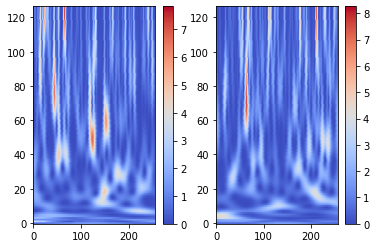

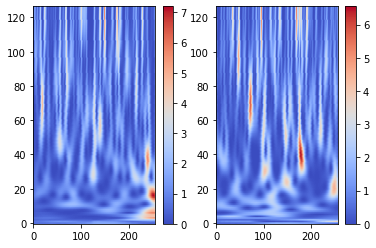

0.0
0.02671984296607923
--------
0.0
0.0021075309539151806
---------
0.0
0.001662053892953343
---------
-1.0
-0.5233135030001731
---------
0.0
0.42159057


In [6]:
import tensorflow as tf

y_true = [Y_test[1], Y_test[10]]
y_pred = [Y_test[2], Y_test[11]]


# plot_predicted_CWT(Y_test[1], Y_test[2])
# plot_predicted_CWT(Y_test[10], Y_test[11])


plot_predicted_CWT(normal_rows(Y_test[1]), normal_rows(Y_test[2]))
plot_predicted_CWT(normal_rows(Y_test[10]), normal_rows(Y_test[11]))

# Using 'auto'/'sum_over_batch_size' reduction type.
mae = tf.keras.losses.MeanAbsoluteError()
print(mae(y_true, y_true).numpy())
print(mae(y_true, y_pred).numpy())

print('--------')

mse = tf.keras.losses.MeanSquaredError()
print(mse(y_true, y_true).numpy())
print(mse(y_true, y_pred).numpy())


print('---------')
mse = tf.keras.losses.MeanSquaredLogarithmicError()
print(mse(y_true, y_true).numpy())
print(mse(y_true, y_pred).numpy())

print('---------')
mse = tf.keras.losses.CosineSimilarity()
print(mse(y_true, y_true).numpy())
print(mse(y_true, y_pred).numpy())

print('---------')
im1 = np.expand_dims(y_true, -1)
im2 = np.expand_dims(y_pred, -1)
mse = SSIMLoss
print(mse(im1, im1).numpy())
print(mse(im1, im2).numpy())

In [268]:
Y_test.shape

(2500, 14, 60)

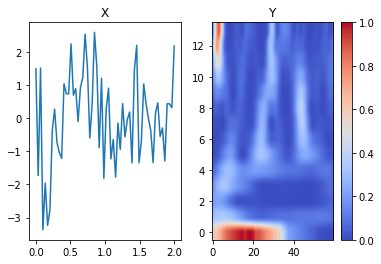

In [258]:
i = np.random.randint(834)
x = X_test[i]
y = Y_test[i]
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(spectralgen.times, np.squeeze(x))
ax1.set_title('X')
mapable = ax2.imshow(
    y,
    # cwtmatr,
    aspect='auto',
    origin='lower',
    cmap='coolwarm',
)
ax2.set_title('Y')
plt.colorbar(mapable, ax=ax2)
plt.show()


In [161]:
X_train.shape

(2499, 1, 30, 1)

In [84]:
np.expand_dims(Y_train, -1).shape

(2499, 14, 120, 1)

In [242]:
# 1 sec, 30 Hz

model_des = ModelDesign(
    tf.keras.Input((1, X_train.shape[2], 1)),
    tf.keras.layers.Conv2DTranspose(10, (14, 10), activation='relu'),
    tf.keras.layers.Conv2D(1, (1, 10), activation='relu'),
)

# model_des = ModelDesign(
#     tf.keras.Input((1, X_train.shape[2], 1)),
#     tf.keras.layers.Conv2DTranspose(10, (10, 10), activation='relu',),
#     tf.keras.layers.Conv2DTranspose(10, (10, 10), activation='relu'),
#     tf.keras.layers.Conv2D(1, (6, 19), activation='relu'),
# )

# model_des = ModelDesign(
#     tf.keras.Input((1, X_train.shape[2], 1)),
#     tf.keras.layers.Conv2DTranspose(10, (10, 10), activation='relu',),
#     tf.keras.layers.Conv2DTranspose(10, (10, 10), activation='relu',),
#     tf.keras.layers.Conv2DTranspose(10, (10, 10), activation='relu',),
#     tf.keras.layers.Conv2D(1, (10, 20), activation='relu'),
#     tf.keras.layers.Conv2D(1, (6, 9), activation='relu'),
# )
# model_des()
model = model_des.build()

model.compile(optimizer='adam',
            loss=SSIMLoss
)
model.fit(X_train, np.expand_dims(Y_train, -1), epochs=25, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)], batch_size=200)
SSIMLoss(model(X_test).numpy().astype(float), np.expand_dims(Y_test, -1).astype(float)).numpy()

Epoch 1/25
79/79 [==============================] - 16s 189ms/step - loss: 0.6104
Epoch 2/25
79/79 [==============================] - 15s 193ms/step - loss: 0.1651
Epoch 3/25
79/79 [==============================] - 15s 187ms/step - loss: 0.1154
Epoch 4/25
79/79 [==============================] - 15s 187ms/step - loss: 0.1065
Epoch 5/25
79/79 [==============================] - 15s 191ms/step - loss: 0.0914
Epoch 6/25
79/79 [==============================] - 15s 189ms/step - loss: 0.0880
Epoch 7/25
79/79 [==============================] - 15s 189ms/step - loss: 0.0856
Epoch 8/25
79/79 [==============================] - 15s 189ms/step - loss: 0.0831
Epoch 9/25
79/79 [==============================] - 15s 189ms/step - loss: 0.0782
Epoch 10/25
79/79 [==============================] - 15s 190ms/step - loss: 0.0757
Epoch 11/25
79/79 [==============================] - 15s 192ms/step - loss: 0.0730
Epoch 12/25
79/79 [==============================] - 15s 190ms/step - loss: 0.0687
Epoch 13/25
7

0.07676554

In [260]:
print(X_train.shape, Y_train.shape)

(7500, 60) (7500, 14, 60)


In [275]:
# 2 sec, 30 Hz

model_des = ModelDesign(
    tf.keras.Input((1, X_train.shape[2], 1)),
    tf.keras.layers.Conv2DTranspose(10, (14, 10), activation='relu'),
    tf.keras.layers.Conv2D(1, (1, 10), activation='relu'),
)

# model_des = ModelDesign(
#     tf.keras.Input((1, X_train.shape[2], 1)),
#     tf.keras.layers.Conv2DTranspose(10, (10, 10), activation='relu',),
#     tf.keras.layers.Conv2DTranspose(10, (10, 10), activation='relu'),
#     tf.keras.layers.Conv2D(1, (6, 19), activation='relu'),
# )

# model_des = ModelDesign(
#     tf.keras.Input((1, X_train.shape[2], 1)),
#     tf.keras.layers.Conv2DTranspose(10, (10, 10), activation='relu',),
#     tf.keras.layers.Conv2DTranspose(10, (10, 10), activation='relu',),
#     tf.keras.layers.Conv2DTranspose(10, (10, 10), activation='relu',),
#     tf.keras.layers.Conv2D(1, (10, 20), activation='relu'),
#     tf.keras.layers.Conv2D(1, (6, 9), activation='relu'),
# )

# model_des()

model = model_des.build()

model.compile(optimizer='adam',
            loss=SSIMLoss
)
model.fit(X_train, np.expand_dims(Y_train, -1), epochs=25, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)], batch_size=200)
SSIMLoss(model(X_test).numpy().astype(float), np.expand_dims(Y_test, -1).astype(float)).numpy()

Epoch 1/25
38/38 [==============================] - 77s 2s/step - loss: 0.6094
Epoch 2/25
38/38 [==============================] - 76s 2s/step - loss: 0.2646
Epoch 3/25
38/38 [==============================] - 76s 2s/step - loss: 0.1962
Epoch 4/25
38/38 [==============================] - 78s 2s/step - loss: 0.1695
Epoch 5/25
38/38 [==============================] - 78s 2s/step - loss: 0.1640
Epoch 6/25
38/38 [==============================] - 78s 2s/step - loss: 0.1474
Epoch 7/25
38/38 [==============================] - 78s 2s/step - loss: 0.1415
Epoch 8/25
38/38 [==============================] - 78s 2s/step - loss: 0.1360
Epoch 9/25
38/38 [==============================] - 78s 2s/step - loss: 0.1303
Epoch 10/25
38/38 [==============================] - 79s 2s/step - loss: 0.1264
Epoch 11/25
38/38 [==============================] - 81s 2s/step - loss: 0.1234
Epoch 12/25
38/38 [==============================] - 85s 2s/step - loss: 0.1287
Epoch 13/25
38/38 [==============================

0.10328144

In [280]:
print(X_train.shape, Y_train.shape)

(7500, 1, 60, 1) (7500, 29, 60)


In [308]:
# 1 sec, 60 Hz

# model_des = ModelDesign(
#     tf.keras.Input((1, X_train.shape[2], 1)),
#     tf.keras.layers.Conv2DTranspose(10, (29, 10), activation='relu'),
#     tf.keras.layers.Conv2D(1, (1, 10), activation='relu'),
# )

# model_des = ModelDesign(
#     tf.keras.Input((1, X_train.shape[2], 1)),
#     tf.keras.layers.Conv2DTranspose(10, (15, 10), activation='relu',),
#     tf.keras.layers.Conv2DTranspose(10, (15, 10), activation='relu'),
#     tf.keras.layers.Conv2D(1, (1, 19), activation='relu'),
# )

model_des = ModelDesign(
    tf.keras.Input((1, X_train.shape[2], 1)),
    tf.keras.layers.Conv2DTranspose(10, (15, 10), activation='relu',),
    tf.keras.layers.Conv2DTranspose(10, (15, 10), activation='relu',),
    tf.keras.layers.Conv2DTranspose(10, (15, 10), activation='relu',),
    tf.keras.layers.Conv2D(1, (10, 20), activation='relu'),
    tf.keras.layers.Conv2D(1, (6, 9), activation='relu'),
)

# model_des()

model = model_des.build()

model.compile(optimizer='adam',
            loss=SSIMLoss
)
model.fit(X_train, np.expand_dims(Y_train, -1), epochs=25, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)], batch_size=200)
SSIMLoss(model(X_test).numpy().astype(float), np.expand_dims(Y_test, -1).astype(float)).numpy()

Epoch 1/25
38/38 [==============================] - 158s 4s/step - loss: 0.6936
Epoch 2/25
38/38 [==============================] - 156s 4s/step - loss: 0.4507
Epoch 3/25
38/38 [==============================] - 159s 4s/step - loss: 0.2303
Epoch 4/25
38/38 [==============================] - 160s 4s/step - loss: 0.1684
Epoch 5/25
38/38 [==============================] - 163s 4s/step - loss: 0.1439
Epoch 6/25
38/38 [==============================] - 159s 4s/step - loss: 0.1321
Epoch 7/25
38/38 [==============================] - 159s 4s/step - loss: 0.1227
Epoch 8/25
38/38 [==============================] - 155s 4s/step - loss: 0.1176
Epoch 9/25
38/38 [==============================] - 158s 4s/step - loss: 0.1157
Epoch 10/25
38/38 [==============================] - 159s 4s/step - loss: 0.1102
Epoch 11/25
38/38 [==============================] - 164s 4s/step - loss: 0.1074
Epoch 12/25
38/38 [==============================] - 159s 4s/step - loss: 0.1036
Epoch 13/25
38/38 [==================

2022-06-10 16:56:33.723975: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 374100000 exceeds 10% of free system memory.
2022-06-10 16:56:44.596603: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 374100000 exceeds 10% of free system memory.
2022-06-10 16:56:44.723954: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 374100000 exceeds 10% of free system memory.


0.08718389

In [5]:
print(X_train.shape, Y_train.shape)

(7500, 1, 120, 1) (7500, 59, 120)


In [20]:
# 1 sec, 120 Hz

model_des = ModelDesign(
    tf.keras.Input((1, X_train.shape[2], 1)),
    tf.keras.layers.Conv2DTranspose(10, (59, 10), activation='relu'),
    tf.keras.layers.Conv2D(1, (1, 10), activation='relu'),
)

# model_des = ModelDesign(
#     tf.keras.Input((1, X_train.shape[2], 1)),
#     tf.keras.layers.Conv2DTranspose(10, (30, 10), activation='relu',),
#     tf.keras.layers.Conv2DTranspose(10, (30, 10), activation='relu'),
#     tf.keras.layers.Conv2D(1, (1, 19), activation='relu'),
# )

# model_des = ModelDesign(
#     tf.keras.Input((1, X_train.shape[2], 1)),
#     tf.keras.layers.Conv2DTranspose(10, (30, 10), activation='relu',),
#     tf.keras.layers.Conv2DTranspose(10, (30, 10), activation='relu',),
#     tf.keras.layers.Conv2DTranspose(10, (30, 10), activation='relu',),
#     tf.keras.layers.Conv2D(1, (15, 20), activation='relu'),
#     tf.keras.layers.Conv2D(1, (16, 9), activation='relu'),
# )

# model_des()

model = model_des.build()

model.compile(optimizer='adam',
            loss=SSIMLoss
)
model.fit(X_train, np.expand_dims(Y_train, -1), epochs=25, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)], batch_size=200)
SSIMLoss(model(X_test).numpy().astype(float), np.expand_dims(Y_test, -1).astype(float)).numpy()

Epoch 1/25
38/38 [==============================] - 1117s 29s/step - loss: 0.4984
Epoch 2/25
17/38 [============>.................] - ETA: 10:15 - loss: 0.3948

In [3]:
print(X_train.shape, Y_train.shape)

(7500, 1, 256, 1) (7500, 127, 256)


In [6]:
# 1 sec, 256 Hz

model_des = ModelDesign(
    tf.keras.Input((1, X_train.shape[2], 1)),
    tf.keras.layers.Conv2DTranspose(10, (127, 10), activation='relu'),
    tf.keras.layers.Conv2D(1, (1, 10), activation='relu'),
)

# model_des = ModelDesign(
#     tf.keras.Input((1, X_train.shape[2], 1)),
#     tf.keras.layers.Conv2DTranspose(10, (30, 10), activation='relu',),
#     tf.keras.layers.Conv2DTranspose(10, (30, 10), activation='relu'),
#     tf.keras.layers.Conv2D(1, (1, 19), activation='relu'),
# )

# model_des = ModelDesign(
#     tf.keras.Input((1, X_train.shape[2], 1)),
#     tf.keras.layers.Conv2DTranspose(10, (30, 10), activation='relu',),
#     tf.keras.layers.Conv2DTranspose(10, (30, 10), activation='relu',),
#     tf.keras.layers.Conv2DTranspose(10, (30, 10), activation='relu',),
#     tf.keras.layers.Conv2D(1, (15, 20), activation='relu'),
#     tf.keras.layers.Conv2D(1, (16, 9), activation='relu'),
# )

# model_des()

model = model_des.build()

model.compile(optimizer='adam',
            loss=SSIMLoss
)
model.fit(X_train, np.expand_dims(Y_train, -1), epochs=5, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)], batch_size=200)
SSIMLoss(model(X_test).numpy().astype(float), np.expand_dims(Y_test, -1).astype(float)).numpy()

Epoch 1/25


2022-06-10 20:22:17.422843: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 975360000 exceeds 10% of free system memory.
2022-06-10 20:22:18.835635: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 269240000 exceeds 10% of free system memory.
2022-06-10 20:22:25.486429: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 269240000 exceeds 10% of free system memory.
2022-06-10 20:22:25.486491: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 39014400 exceeds 10% of free system memory.
2022-06-10 20:22:26.751493: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 39014400 exceeds 10% of free system memory.


38/38 [==============================] - 338s 9s/step - loss: 0.3311
Epoch 2/25
38/38 [==============================] - 342s 9s/step - loss: 0.1687
Epoch 3/25
38/38 [==============================] - 347s 9s/step - loss: 0.1231
Epoch 4/25
34/38 [=========================>....] - ETA: 37s - loss: 0.1135

: 

: 

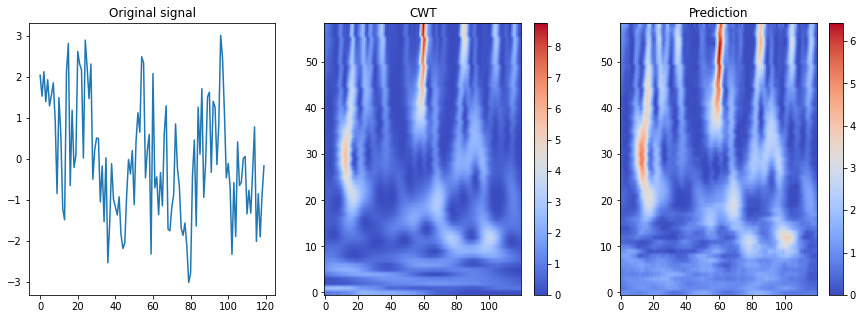

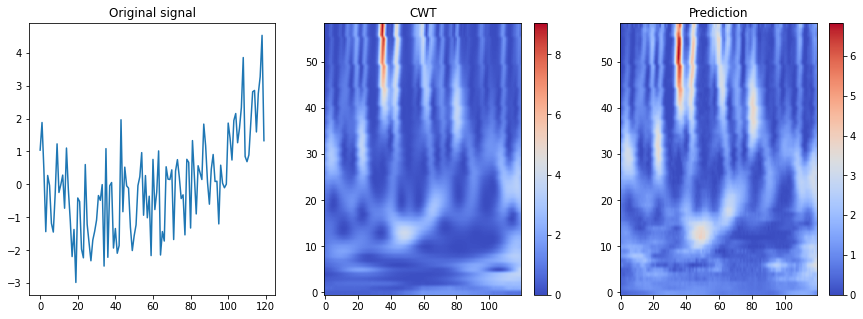

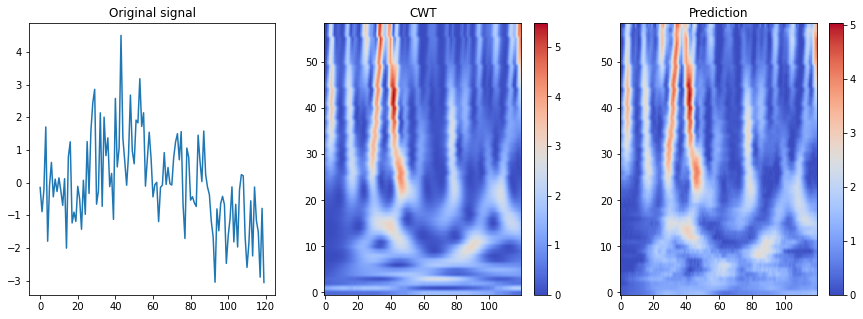

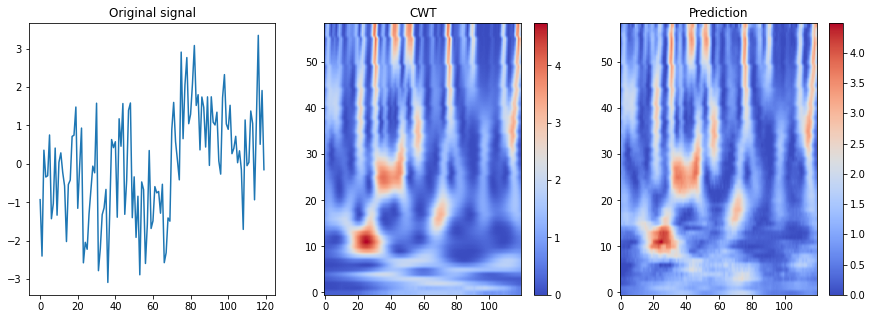

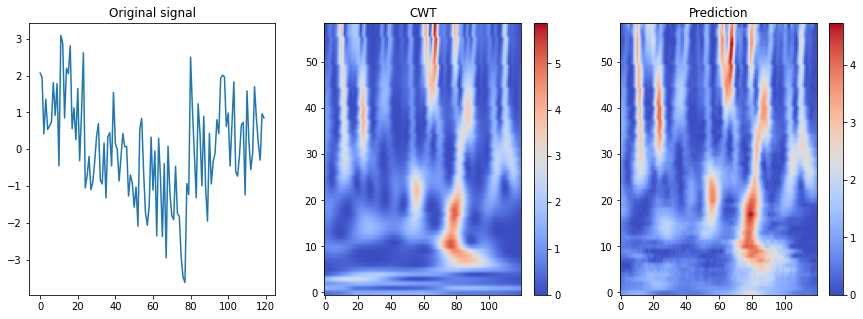

In [13]:
Y_p = model(X_test).numpy()

for i in range(5):
    plot_predicted_CWT_tc(normal_rows(Y_test[i]), normal_rows(Y_p[i]), np.squeeze(X_test[i]))

In [233]:
model_des = ModelDesign(
    tf.keras.Input((1, X_train.shape[2], 1)),
    tf.keras.layers.Conv2DTranspose(10, (10, 10), activation='relu',),
    tf.keras.layers.Conv2DTranspose(10, (10, 10), activation='relu',),
    tf.keras.layers.Conv2DTranspose(10, (10, 10), activation='relu',),
    tf.keras.layers.Conv2D(1, (10, 20), activation='relu'),
    tf.keras.layers.Conv2D(1, (6, 9), activation='relu'),
)
model_des()

<KerasTensor: shape=(None, 14, 30, 1) dtype=float32 (created by layer 'conv2d_79')>